### Download pretrained models from here:

https://drive.google.com/open?id=1H29OVZn5jdlQDQt6_R7eK7WOEinmgxcy

and place it to "$PROJECT_DIR/data/pascal3d_mixture_models"

In [1]:
import os
os.listdir('../data/pascal3d_mixture_models')

['bimixture_aeroplane_22dd6663baaa4b036f73_hls512_zs_8_ns_50.1e.h5',
 'bimixture_bicycle_e34d50260b35e1bbcc23_hls512_zs_8_ns_50.1e.h5',
 'bimixture_boat_03ae2526de206dc19ad2_hls512_zs_8_ns_50.1e.h5',
 'bimixture_bottle_aeb49f5e6ee1e121ee13_hls512_zs_8_ns_50.1e.h5',
 'bimixture_bus_da412befc49da01e8bb3_hls512_zs_8_ns_50.1e.h5',
 'bimixture_car_6fa849cf02e36d3a5439_hls512_zs_8_ns_50.1e.h5',
 'bimixture_chair_842f7e57a518a42885ae_hls512_zs_8_ns_50.1e.h5',
 'bimixture_diningtable_961d40af07ac4648999e_hls512_zs_8_ns_50.1e.h5',
 'bimixture_motorbike_ce1571e3fcaa4af3bcb2_hls512_zs_8_ns_50.1e.h5',
 'bimixture_sofa_6fc1d35ce3722b2ffa46_hls512_zs_8_ns_50.1e.h5',
 'bimixture_train_089daf36e5ec6527221c_hls512_zs_8_ns_50.1e.h5',
 'bimixture_tvmonitor_4521b16a8d12ce9f1e8b_hls512_zs_8_ns_50.1e.h5']

### Load data for the class of interest

In [2]:
from datasets import pascal3d

cls = 'aeroplane' # if cls is None, all classes will be loaded
pascaldb_path = '../data/pascal3d+_imagenet_train_test.h5'
x_train, y_train, x_val, y_val, x_test, y_test = pascal3d.load_pascal_data(pascaldb_path, cls=cls)

### Define and load pretrained model

In [3]:
# if you want to use pretrained Inception\Resnet models as a backbone and experience problems 
# with Keras automatically downloading the weights (SSL certiticate issues), download it manually from here:
#
# https://github.com/fchollet/deep-learning-models/releases/download/v0.7/inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5
# https://github.com/keras-team/keras-applications/releases/download/densenet/densenet169_weights_tf_dim_ordering_tf_kernels_notop.h5
#
# and place it to $HOME/.keras/models

from models.infinite_mixture import BiternionMixture

model = BiternionMixture(z_size=8, backbone_cnn='inception', hlayer_size=512, n_samples=50)
model.model.load_weights('../data/pascal3d_mixture_models/bimixture_aeroplane_22dd6663baaa4b036f73_hls512_zs_8_ns_50.1e.h5')

Using TensorFlow backend.


### Get densities and pointwise predictions

In [4]:
az_deg, el_deg, tilt_deg = model.predict(x_test[0:10])
xvals, az_pdf = model.pdf(x_test[0:10], gamma=1.0e-1, angle='azimuth')

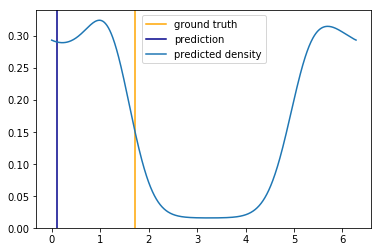

In [5]:
import numpy as np
from utils import angles
import matplotlib.pyplot as plt
%matplotlib inline

fid = 9
plt.axvline(angles.bit2rad(y_test)[fid], c='orange', label='ground truth')
plt.axvline(np.deg2rad(az_deg[fid]), c='darkblue', label='prediction')
plt.plot(xvals, az_pdf[fid], label='predicted density')
plt.legend()

### Visualize predictions

saving frame detections to ../logs/detection_examples/frame_0.png


/Users/prokus/deep_direct_stat/py_env/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


saving frame detections to ../logs/detection_examples/frame_1.png
saving frame detections to ../logs/detection_examples/frame_2.png
saving frame detections to ../logs/detection_examples/frame_3.png
saving frame detections to ../logs/detection_examples/frame_4.png
saving frame detections to ../logs/detection_examples/frame_5.png
saving frame detections to ../logs/detection_examples/frame_6.png
saving frame detections to ../logs/detection_examples/frame_7.png
saving frame detections to ../logs/detection_examples/frame_8.png
saving frame detections to ../logs/detection_examples/frame_9.png


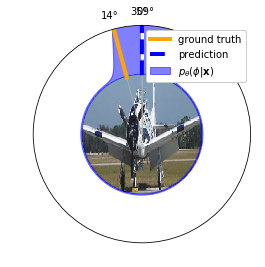

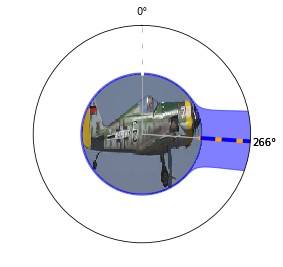

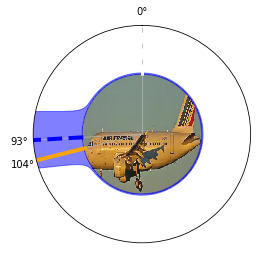

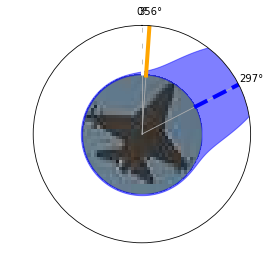

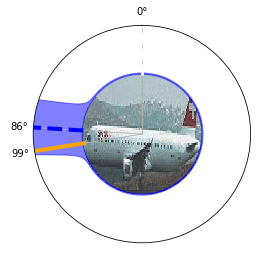

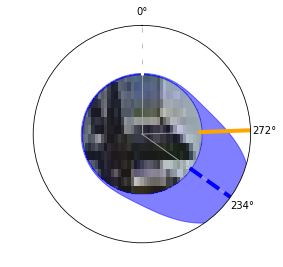

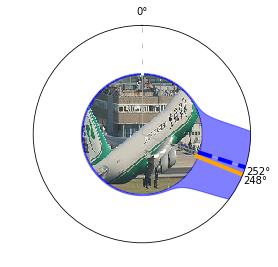

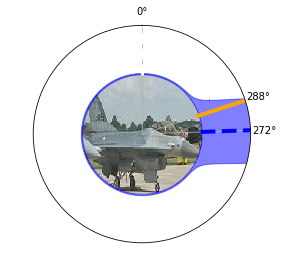

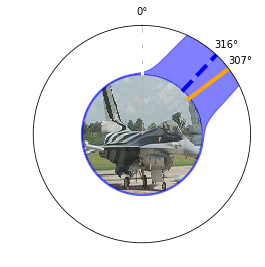

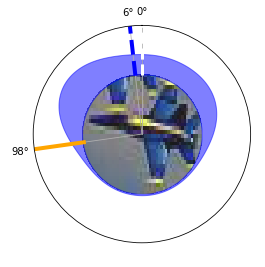

In [6]:
fig_path = '../logs/detection_examples'

if not os.path.exists(fig_path):
    os.mkdir(fig_path)

model.visualize_detections_on_circle(x_test[0:10], y_true=y_test, save_figs=True, save_path=fig_path)

### Run internal evaluation: compute mean absolute angular deviation (MAAD) and average log-likelihood

In [7]:
model.evaluate(x_test, y_test)

MAAD azimuth : 21.56+-1.96SE
MAAD elevation : 9.07+-1.09SE
MAAD tilt : 5.81+-0.51SE
Log-likelihood azimuth : -0.48+-0.08SE
Log-likelihood elevation : 0.26+-0.11SE
Log-likelihood tilt : 0.82+-0.08SE
MAAD TOTAL: 12.14+-1.96SE
Log-likelihood TOTAL: 0.61+-0.21SE


(12.142134417909567, 0.6071955791318012, 0.2107679115907373)

### Save detections for official Matlab evaluation

In [8]:
save_dir = '../logs/vp_test_results/'

if not os.path.exists(save_dir):
    os.mkdir(save_dir)

model.save_detections_for_official_eval(x_test, os.path.join(save_dir, '%s_pred_view.txt'%cls))

evaluation data saved to ../logs/vp_test_results/aeroplane_pred_view.txt
